**Project: Employee Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

1) Loading the dataset

In [ ]:
employee_df = pd.read_csv("Employee.csv")

2) Understanding the dataset

In [ ]:
employee_df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [ ]:
# 4653 rows and 9 columns
employee_df.shape

(4653, 9)

In [ ]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [ ]:
employee_df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [ ]:
employee_df.dtypes

,0
Education,object
JoiningYear,int64
City,object
PaymentTier,int64
Age,int64
Gender,object
EverBenched,object
ExperienceInCurrentDomain,int64
LeaveOrNot,int64


4. Handling missing values

In [ ]:
employee_df.isnull().sum()   #no null values

,0
Education,0
JoiningYear,0
City,0
PaymentTier,0
Age,0
Gender,0
EverBenched,0
ExperienceInCurrentDomain,0
LeaveOrNot,0


In [ ]:
employee_df.duplicated().sum()

np.int64(1889)

In [ ]:
employee_df = employee_df.drop_duplicates()
print(employee_df)
#Duplicates were removed - ensures each employee is counted only once.

      Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0     Bachelors         2017  Bangalore            3   34    Male          No   
1     Bachelors         2013       Pune            1   28  Female          No   
2     Bachelors         2014  New Delhi            3   38  Female          No   
3       Masters         2016  Bangalore            3   27    Male          No   
4       Masters         2017       Pune            3   24    Male         Yes   
...         ...          ...        ...          ...  ...     ...         ...   
4645    Masters         2017       Pune            2   31  Female          No   
4647  Bachelors         2016       Pune            3   30    Male          No   
4649    Masters         2013       Pune            2   37    Male          No   
4650    Masters         2018  New Delhi            3   27    Male          No   
4651  Bachelors         2012  Bangalore            3   30    Male         Yes   

      ExperienceInCurrentDo

In [ ]:
# Converting EverBenched column to numerical codes (0/1)
employee_df.loc[:, 'EverBenched_code'] = employee_df['EverBenched'].astype('category').cat.codes

#result
employee_df[['EverBenched', 'EverBenched_code']].head()

#EverBenched was converted into numeric codes (0 = No, 1 = Yes)


,EverBenched,EverBenched_code
0,No,0
1,No,0
2,No,0
3,No,0
4,Yes,1


5. Adding tenure colum

In [ ]:
#Calculating tenure - CurrentYear – JoiningYear
import datetime

#current year
current_year = datetime.datetime.now().year

#Creating new column 'Tenure'
employee_df.loc[:, 'JoiningYear'] = current_year - employee_df['JoiningYear']

#result
employee_df[['JoiningYear', 'Tenure']].head()

#Tenure was calculated (Current Year – Joining Year) - shows how long employees have been with the company.

,JoiningYear,Tenure
0,2017,8
1,2013,12
2,2014,11
3,2016,9
4,2017,8


6. Filtering by Employee Bench

In [ ]:
#No  → 0, Yes → 1
employee_df[employee_df['EverBenched_code'] == 0]  # gets employees who were NOT benched

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,EverBenched _code,EverBenched_code,Tenure
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0,0,0,8
1,Bachelors,2013,Pune,1,28,Female,No,3,1,0,0,12
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0,0,0,11
3,Masters,2016,Bangalore,3,27,Male,No,5,1,0,0,9
5,Bachelors,2016,Bangalore,3,22,Male,No,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...
4643,Bachelors,2013,Bangalore,3,31,Female,No,5,0,0,0,12
4645,Masters,2017,Pune,2,31,Female,No,2,0,0,0,8
4647,Bachelors,2016,Pune,3,30,Male,No,2,0,0,0,9
4649,Masters,2013,Pune,2,37,Male,No,2,1,0,0,12


In [ ]:
employee_df[employee_df['EverBenched_code'] == 1]  # gets employees who WERE benched

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,EverBenched _code,EverBenched_code,Tenure
4,Masters,2017,Pune,3,24,Male,Yes,2,1,1,1,8
12,Bachelors,2018,Pune,3,32,Male,Yes,5,1,1,1,7
23,Bachelors,2015,Bangalore,3,27,Male,Yes,5,0,1,1,10
25,Bachelors,2013,Bangalore,3,22,Female,Yes,0,0,1,1,12
39,Bachelors,2014,Pune,3,30,Male,Yes,4,0,1,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...
4576,Bachelors,2013,Pune,3,24,Male,Yes,2,0,1,1,12
4583,Bachelors,2016,Pune,3,36,Male,Yes,3,0,1,1,9
4637,Bachelors,2018,Bangalore,3,32,Male,Yes,2,1,1,1,7
4644,Bachelors,2015,Pune,3,32,Female,Yes,1,1,1,1,10


7. Grouping and Aggregation

In [ ]:
# Grouping by PaymentTier and average Age and Experience
employee_df.groupby('PaymentTier')[['Age', 'ExperienceInCurrentDomain']].mean()

,Age,ExperienceInCurrentDomain
PaymentTier,,
1,30.009174,2.697248
2,30.631579,2.626316
3,31.149798,2.643725


In [ ]:
#count of employes in each payment tier
employee_df.groupby('PaymentTier').size()

,0
PaymentTier,
1,218
2,570
3,1976


In [ ]:
# Grouping by Education and calculating average PaymentTier
avg_payment_by_education = employee_df.groupby('Education')['PaymentTier'].mean().reset_index()

# Renaming column
avg_payment_by_education.rename(columns={'PaymentTier': 'Avg_PaymentTier'}, inplace=True)

# result
print(avg_payment_by_education)
#higher education levels are with slightly higher average pay.

   Education  Avg_PaymentTier
0  Bachelors         2.677321
1    Masters         2.492936
2        PHD         2.698718


8. Condition check

In [ ]:
#working age
condition = (employee_df['Age'] >= 18) & (employee_df['Age'] <= 65)
print(condition)
#confirms most employees fall within legal working age (18–65).

0       True
1       True
2       True
3       True
4       True
        ... 
4645    True
4647    True
4649    True
4650    True
4651    True
Name: Age, Length: 2764, dtype: bool


In [ ]:
#domain experinece and tenure
check = employee_df['ExperienceInCurrentDomain'] <= employee_df['Tenure']
print(check)
# checks employee's reported domain experience does not exceed their total tenure.

0       True
1       True
2       True
3       True
4       True
        ... 
4645    True
4647    True
4649    True
4650    True
4651    True
Length: 2764, dtype: bool


9. Count of Employee

In [ ]:
# Count of employees joining each year
hiring_count = employee_df.groupby('JoiningYear').size().reset_index(name='NumHired')
print(hiring_count)

   JoiningYear  NumHired
0         2012       308
1         2013       396
2         2014       385
3         2015       464
4         2016       310
5         2017       662
6         2018       239


In [ ]:
#Sum of employees who left per joining year
employee_left = employee_df.groupby('JoiningYear')['LeaveOrNot'].sum().reset_index(name='NumLeft')
print(employee_left)

   JoiningYear  NumLeft
0         2012       83
1         2013      171
2         2014      119
3         2015      192
4         2016       88
5         2017      201
6         2018      234


10. Data Visualization

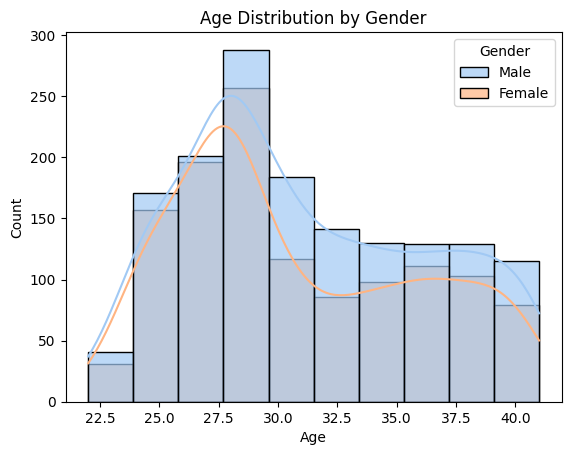

In [ ]:
#Age Distribution by Gender
sns.histplot(data=employee_df, x='Age', hue='Gender', bins=10, kde=True, palette='pastel', alpha=0.7)
plt.title("Age Distribution by Gender")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


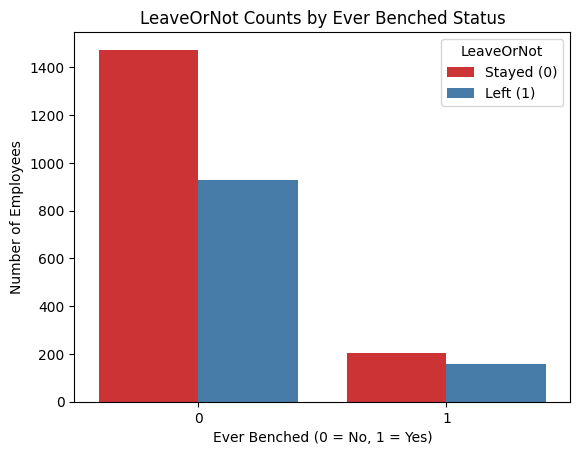

In [ ]:
#LeaveOrNot Counts by Ever Benched Status
sns.countplot(x='EverBenched_code', hue='LeaveOrNot', data=employee_df, palette='Set1')
plt.title("LeaveOrNot Counts by Ever Benched Status")
plt.xlabel("Ever Benched (0 = No, 1 = Yes)")
plt.ylabel("Number of Employees")
plt.legend(title="LeaveOrNot", labels=['Stayed (0)', 'Left (1)'])
plt.show()
#most employees who were benched (EverBenched = Yes) left the company.

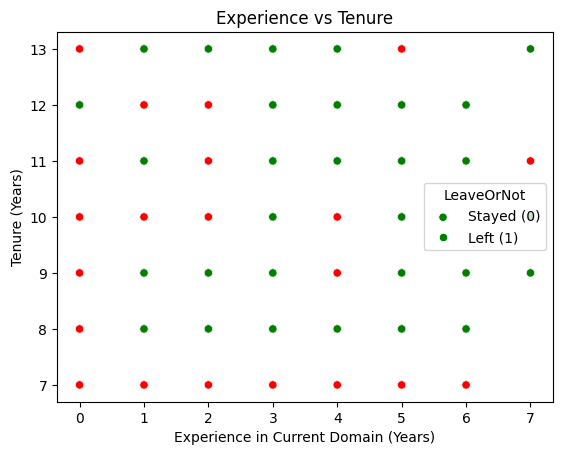

In [ ]:
#Experience vs Tenure
sns.scatterplot(x='ExperienceInCurrentDomain', y='Tenure', hue='LeaveOrNot', data=employee_df, palette=['green','red'])
plt.title("Experience vs Tenure")
plt.xlabel("Experience in Current Domain (Years)")
plt.ylabel("Tenure (Years)")
plt.legend(title="LeaveOrNot", labels=['Stayed (0)', 'Left (1)'])
plt.show()

#Employees who stay have tenure and experience aligns (experience roughly matches tenure).

#Employees who leave often show mismatches (e.g., high tenure but low domain experience, or vice versa), indicating dissatisfaction with role fit.

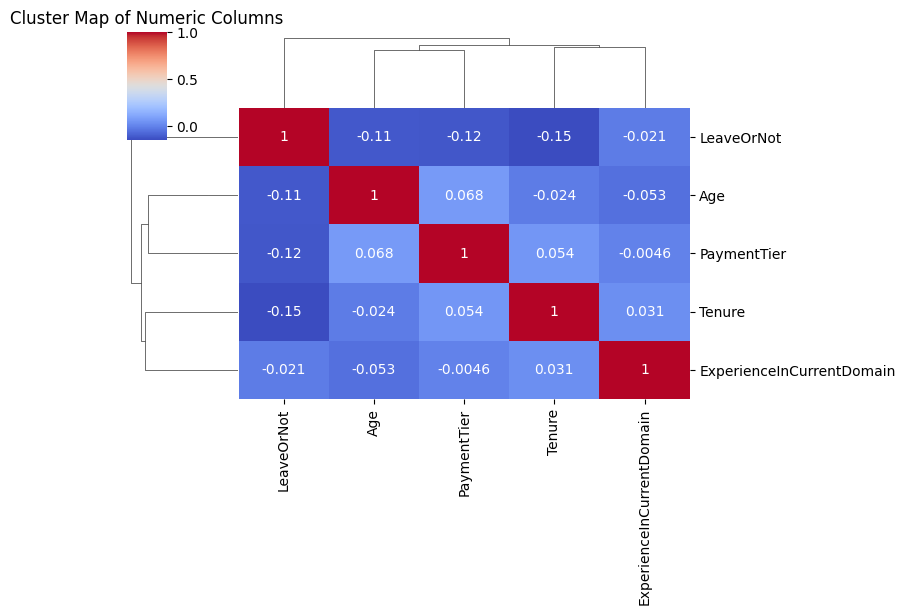

In [ ]:
#correlation between numeric columns like Age, Tenure, ExperienceInCurrentDomain, PaymentTier, LeaveOrNot
numeric_cols = ['Age', 'Tenure', 'ExperienceInCurrentDomain', 'PaymentTier', 'LeaveOrNot']
sns.clustermap(employee_df[numeric_cols].corr(), annot=True, cmap='coolwarm', figsize=(8,6))
plt.title("Cluster Map of Numeric Columns")
plt.show()

#Tenure and Experience are strongly positively correlated (longer tenure → more experience).

# PaymentTier has a weak positive link with age, meaning older employees are slightly more likely to be in higher pay tiers.

# No strong correlation with attrition directly, suggesting multiple factors drive leaving decisions.

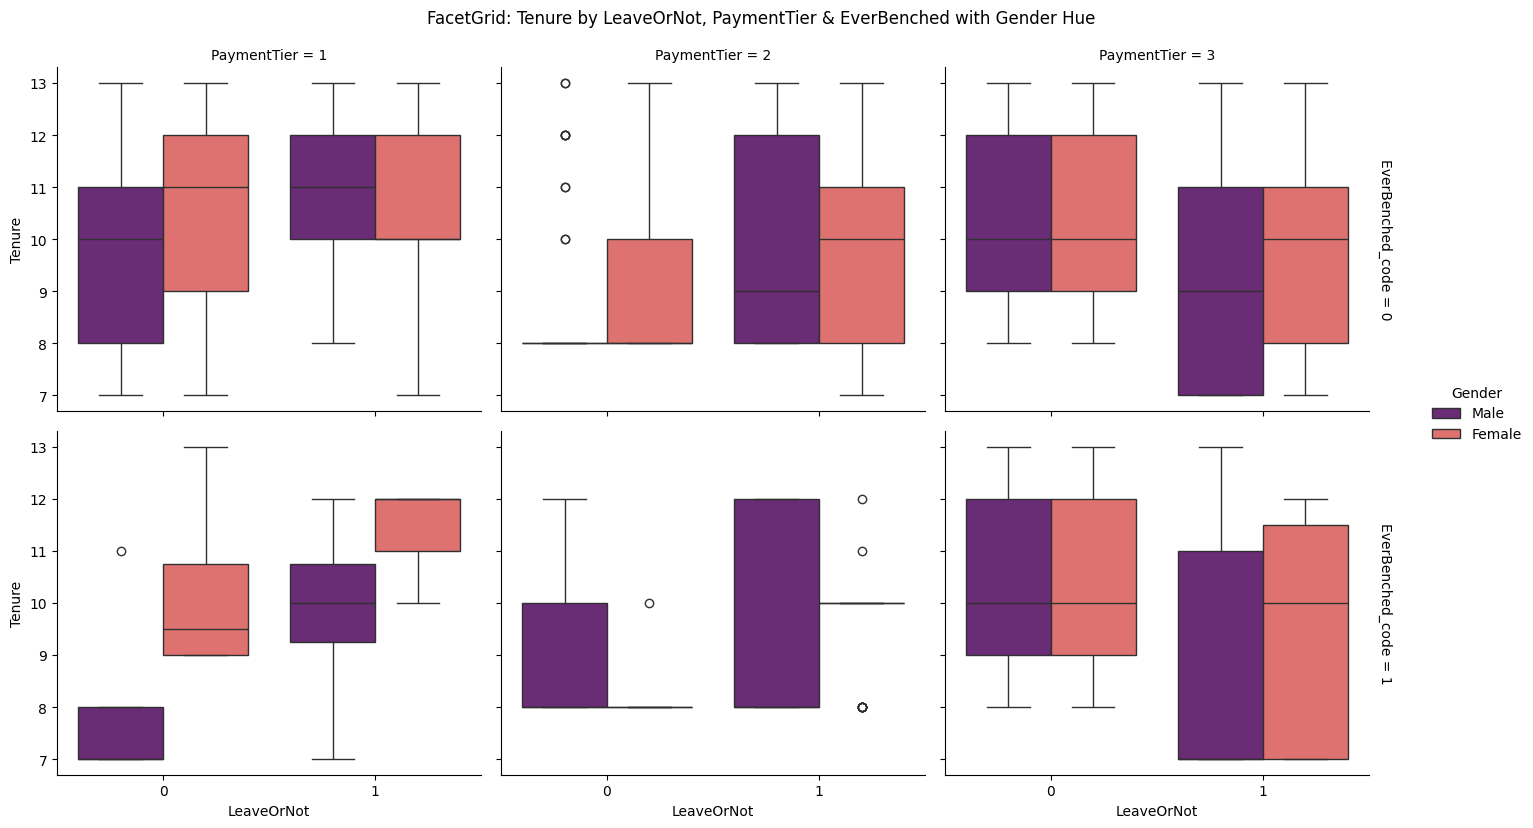

In [ ]:
#Facetgrid
g = sns.FacetGrid(employee_df, col='PaymentTier', row='EverBenched_code', height=4, aspect=1.2, margin_titles=True)
g.map_dataframe(sns.boxplot, x='LeaveOrNot', y='Tenure', hue='Gender', palette='magma', order=[0,1])
g.add_legend(title='Gender')
g.set_axis_labels("LeaveOrNot", "Tenure")
g.fig.suptitle("FacetGrid: Tenure by LeaveOrNot, PaymentTier & EverBenched with Gender Hue", y=1.03)
plt.show()

#Tenure patterns differ by PaymentTier, Benched status, and Gender.

#In higher payment tiers, employees tend to stay longer, while benched employees leave earlier.

#Gender differences also appear, one gender may leave earlier in low-tier or benched groups.

11. Statistical Analysis

In [ ]:
numeric_cols = ['Age', 'Tenure', 'ExperienceInCurrentDomain', 'PaymentTier']

# Loop through each column and calculate basic statistics
for col in numeric_cols:
    data = employee_df[col].dropna()  # Remove missing values
    mean = data.mean()
    median = data.median()
    mode = data.mode()[0]
    data_range = data.max() - data.min()
    variance = data.var()
    std_dev = data.std()

    print(f"\n--- {col} ---")
    print("Mean:", mean)
    print("Median:", median)
    print("Mode:", mode)
    print("Range:", data_range)
    print("Variance:", variance)
    print("Standard Deviation:", std_dev)

    #Age and experience are fairly balanced (close mean & median), but tenure shows wider variation, meaning employees stay for very different lengths of time.


--- Age ---
Mean: 30.952966714905934
Median: 30.0
Mode: 28
Range: 19
Variance: 26.100573895381114
Standard Deviation: 5.108872076631115

--- Tenure ---
Mean: 9.909551374819102
Median: 10.0
Mode: 8
Range: 6
Variance: 3.556781702390417
Standard Deviation: 1.8859431864163927

--- ExperienceInCurrentDomain ---
Mean: 2.644356005788712
Median: 2.0
Mode: 2
Range: 7
Variance: 2.594065129819128
Standard Deviation: 1.6106101731390896

--- PaymentTier ---
Mean: 2.6360347322720696
Median: 3.0
Mode: 3
Range: 2
Variance: 0.38937782868827975
Standard Deviation: 0.6240014652933755


In [ ]:
# Correlation
print(employee_df[['Age','Tenure','ExperienceInCurrentDomain','PaymentTier']].corr())

#Strong positive link between tenure and experience; employees with longer tenure naturally build more domain experience.

                                Age    Tenure  ExperienceInCurrentDomain  \
Age                        1.000000 -0.024445                  -0.053276   
Tenure                    -0.024445  1.000000                   0.031228   
ExperienceInCurrentDomain -0.053276  0.031228                   1.000000   
PaymentTier                0.067514  0.053823                  -0.004602   

                           PaymentTier  
Age                           0.067514  
Tenure                        0.053823  
ExperienceInCurrentDomain    -0.004602  
PaymentTier                   1.000000  


In [ ]:
# Covariance
print(employee_df[['Age','Tenure','ExperienceInCurrentDomain','PaymentTier']].cov())


                                 Age    Tenure  ExperienceInCurrentDomain  \
Age                        26.100574 -0.235526                  -0.438376   
Tenure                     -0.235526  3.556782                   0.094857   
ExperienceInCurrentDomain  -0.438376  0.094857                   2.594065   
PaymentTier                 0.215231  0.063340                  -0.004625   

                           PaymentTier  
Age                           0.215231  
Tenure                        0.063340  
ExperienceInCurrentDomain    -0.004625  
PaymentTier                   0.389378  


In [ ]:
# 10th, 25th, 50th, 75th, 90th percentiles for numeric columns
print(employee_df[['Age','Tenure','ExperienceInCurrentDomain','PaymentTier']].quantile([0.1,0.25,0.5,0.75,0.9]))

#Show how employees are spread, 75% of employees have tenure below a certain point

       Age  Tenure  ExperienceInCurrentDomain  PaymentTier
0.10  25.0     8.0                        0.0          2.0
0.25  27.0     8.0                        1.0          2.0
0.50  30.0    10.0                        2.0          3.0
0.75  35.0    12.0                        4.0          3.0
0.90  39.0    13.0                        5.0          3.0


In [ ]:
#Anova
from scipy.stats import f_oneway

# Tenure by Education
groups = [group['Tenure'].values for name, group in employee_df.groupby('Education')]
anova_result = f_oneway(*groups)
print("ANOVA result:", anova_result)

#Tenure differences across education groups may exist; if p-value < 0.05, education significantly impacts how long employees stay.

ANOVA result: F_onewayResult(statistic=np.float64(39.22357944660816), pvalue=np.float64(1.595606700024956e-17))


In [ ]:
#Hypothesis Testing
from scipy.stats import ttest_ind, chi2_contingency

# T-test  Tenure for Left vs Stayed
stay_tenure = employee_df[employee_df['LeaveOrNot']==0]['Tenure']
left_tenure = employee_df[employee_df['LeaveOrNot']==1]['Tenure']
ttest_result = ttest_ind(stay_tenure, left_tenure)
print("T-test result:", ttest_result)

#If significant, leavers have different average tenures compared to stayers, meaning tenure length is tied to attrition risk.

# Chi-square  LeaveOrNot vs EverBenched
contingency = pd.crosstab(employee_df['LeaveOrNot'], employee_df['EverBenched'])
chi2, p, dof, expected = chi2_contingency(contingency)
print("Chi-square test result: chi2 =", chi2, ", p-value =", p)

#A significant result shows that being benched increases the likelihood of leaving, making it a strong attrition driver.

T-test result: TtestResult(statistic=np.float64(8.008750840146874), pvalue=np.float64(1.6912741712182375e-15), df=np.float64(2762.0))
Chi-square test result: chi2 = 3.589789188386378 , p-value = 0.05813561756538128


Most employees are within the legal working age of 18–65, with a balanced mix of genders across age groups. Higher payment tiers tend to include slightly older and more experienced employees, and education is moderately linked to higher pay. While age and domain experience are fairly normally distributed, tenure varies widely, and there is a strong correlation between tenure and experience, indicating that employees naturally gain more domain expertise the longer they stay. Employees whose tenure and experience are well-aligned tend to remain longer with the company, whereas mismatches often lead to attrition. Bench status is a key factor affecting retention, as employees who have been benched are more likely to leave, and tenure differs significantly between stayers and leavers, with longer-tenured employees showing higher retention. Payment tier also plays a role, with higher-tier employees generally having longer tenure. Statistical tests indicate that education can influence tenure moderately (ANOVA), leavers and stayers differ significantly in tenure (T-test), and benching significantly increases attrition risk (Chi-square). To improve retention, it is recommended to reduce bench time, ensure proper role fit to align experience and tenure, and closely monitor lower-tier and recently benched employees. Additionally, education should be considered when planning career growth, but attention should primarily be given to maintaining alignment between tenure and experience.

Employee retention is mainly driven by benching, tenure, domain experience, and payment tier, while age and education play a supporting role. Addressing benching and role fit can significantly reduce attrition and improve workforce stability.

In [ ]:
!pip install dash plotly pandas seaborn

In [ ]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px
import pandas as pd
import seaborn as sns

In [ ]:
# Load your dataset
employee_df = pd.read_csv("Employee.csv")

In [ ]:
# Create Tenure column
current_year = 2025
employee_df['Tenure'] = current_year - employee_df['JoiningYear']

In [ ]:
# Convert LeaveOrNot to string for clear labeling
employee_df['LeaveOrNot_str'] = employee_df['LeaveOrNot'].astype(str)

In [ ]:
# Create Dash app
app = Dash(__name__)
server = app.server

# Layout
app.layout = html.Div([
    html.H1("💼 Employee Dashboard", style={'textAlign': 'center'}),

    # Dropdown on Gender instead of PaymentTier
    dcc.Dropdown(
        id='gender-filter',
        options=[{'label': g, 'value': g} for g in employee_df['Gender'].unique()],
        value=None,
        placeholder="🔍 Filter by Gender",
        style={'width': '50%', 'margin': 'auto'}
    ),

    dcc.Graph(id='piechart'),
    dcc.Graph(id='barchart'),
    dcc.Graph(id='linechart'),

    html.H2("📋 Data Table Preview", style={'textAlign': 'center'}),
    html.Div(id='table-div')
])


In [ ]:
# Callbacks
@app.callback(
    [Output('piechart', 'figure'),
     Output('barchart', 'figure'),
     Output('linechart', 'figure'),
     Output('table-div', 'children')],
    Input('gender-filter', 'value')
)
def update_dashboard(gender):
    filtered = employee_df[employee_df['Gender'] == gender] if gender else employee_df

    # Pie Chart: Attrition proportion
    pie_fig = px.pie(filtered, names='LeaveOrNot_str', title="🥧 Attrition Proportion", hole=0.3)
    pie_fig.update_layout(template="plotly_white")

    # Bar Chart: Average Tenure by PaymentTier
    bar_data = filtered.groupby('PaymentTier')['Tenure'].mean().reset_index()
    bar_fig = px.bar(bar_data, x='PaymentTier', y='Tenure',
                     title="📊 Average Tenure by Payment Tier", text_auto=True)
    bar_fig.update_layout(template="plotly_white")

    # Line Chart: Hiring Trend by JoiningYear
    line_data = filtered.groupby('JoiningYear').size().reset_index(name="Hires")
    line_fig = px.line(line_data, x='JoiningYear', y='Hires', markers=True,
                       title="📈 Hiring Trend Over Years")
    line_fig.update_layout(template="plotly_white")

    # Table preview
    table = html.Table([
        html.Thead(html.Tr([html.Th(col) for col in filtered.columns])),
        html.Tbody([
            html.Tr([html.Td(filtered.iloc[i][col]) for col in filtered.columns])
            for i in range(min(len(filtered), 10))
        ])
    ], style={'margin': 'auto', 'width': '80%'})

    return pie_fig, bar_fig, line_fig, table


# Run in Jupyter/Colab
app.run(mode='inline')

<IPython.core.display.Javascript object>